# 1 Regression with Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# 1.1 Anatomy of an MLP: elements of a neural network model

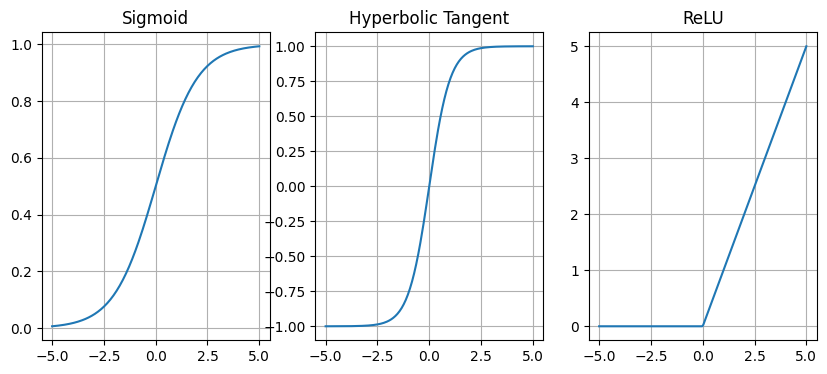

In [2]:
x = np.linspace(-5,5,200)

fig, ax  = plt.subplots(nrows=1, ncols=3,figsize = (10,4))
ax[0].plot(x, 1/(1+np.exp(-x)))
ax[0].set_title('Sigmoid')

ax[1].plot(x, np.tanh(x))
ax[1].set_title('Hyperbolic Tangent')

ax[2].plot(x, np.maximum(0,x))
ax[2].set_title('ReLU')

for p in ax:
    p.grid()

In [3]:
#DATA_DIR = r"C:\Users\Namrata Patil\Downloads\diamonds.csv"
#FILE_NAME = 'diamonds.csv'
#data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(r"C:\Users\Namrata Patil\Downloads\diamonds.csv")

diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182,'x'] = diamonds['x'].median()
diamonds.loc[11182,'z'] = diamonds['z'].median()
diamonds = diamonds.loc[-((diamonds['y']>30) | (diamonds['z']> 30))]

diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [4]:
X = diamonds.drop(['cut','color','clarity', 'price'],axis=1)
y= diamonds['price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1, random_state=123)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components =1 , random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
X_train.drop(['x','y','z'],axis=1,inplace=True)

In [7]:
numerical_features = ['carat','depth','table','dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:,numerical_features]=scaler.transform(X_train[numerical_features])

In [9]:
pip install --upgrade keras


     ---------------------------------------- 1.1/1.1 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 14.6 MB/s eta 0:00:00
     -------------------------------------- 243.8/243.8 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 240.7/240.7 kB 14.4 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 8.2 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


from keras.models import Sequential
nn_reg = Sequential()